# Worksheet for Practical 1

### 1. Load Data

#### The first step is to define the functions and classes we intend to use 
#### We will use the Pandas library to load our dataset and we will use two classes from the Keras library to define our model.

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

#### We are going to use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

#### As such, it is a binary classification problem (onset of diabetes as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

#### The variables can be summarized as follows:

#### Input Variables (X):

#### Number of times pregnant
#### Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### Diastolic blood pressure (mm Hg)
#### Triceps skin fold thickness (mm)
#### 2-Hour serum insulin (mu U/ml)
#### Body mass index (weight in kg/(height in m)^2)
#### Diabetes pedigree function
#### Age (years)

#### Output Variables (y):

#### Class variable (0 or 1)
#### Once the CSV file is loaded into memory, we can split the columns of data into input and output variables.

In [ ]:
# load the dataset
dataset = pd.read_csv('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset.iloc[:,0:8].values # write your code here
Y = dataset.iloc[:,-1].values # write your code here

In [ ]:
dataset.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.shape

(768, 9)

In [ ]:
X[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [ ]:
Y[:5]

array([1, 0, 1, 0, 1])

### 2. Define Keras Model

#### Models in Keras are defined as a sequence of layers.

#### We create a Sequential model 

#### The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

#### In this example, we will use a fully-connected network structure with three layers.

#### Fully connected layers are defined using the Dense class 

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


### 3. Compile Keras Model
#### Now that the model is defined, we can compile it.

#### Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

#### When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

#### We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

#### In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

#### We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

#### Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 4. Fit Keras Model
#### We have defined our model and compiled it ready for efficient computation.

#### Now it is time to execute the model on some data.

#### We can train or fit our model on our loaded data by calling the fit() function on the model.

#### Training occurs over epochs and each epoch is split into batches.

#### Epoch: One pass through all of the rows in the training dataset.
#### Batch: One or more samples considered by the model within an epoch before weights are updated.
#### One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs.
#### The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

#### For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

#### These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

#### This is where the work happens on your CPU or GPU.


In [ ]:
# fit the keras model on the dataset
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

### 5. Evaluate Keras Model
#### We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

#### This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

#### You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

#### This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

#### The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7292
Accuracy: 72.92


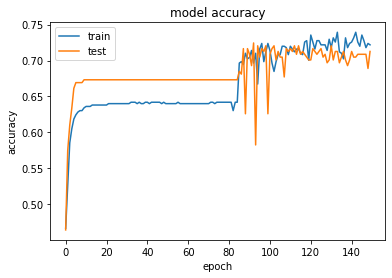

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

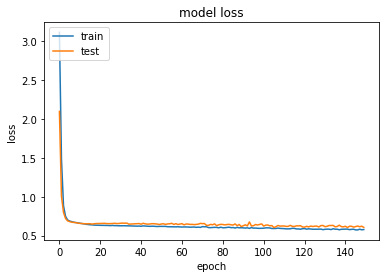

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()